# Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuration for plots
plt.style.use('ggplot')
sns.set_palette("husl")

# Load the master dataset
df = pd.read_csv("../data/processed/master_data.csv")

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

print("Data Loaded Successfully!")
print(f"Shape: {df.shape}")
print(f"Data Year Range: {df['date'].dt.year.min()} to {df['date'].dt.year.max()}")
df.head()

Data Loaded Successfully!
Shape: (2965393, 14)
Data Year Range: 2025 to 2025


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,bio_age_5_17,bio_age_17_,demo_age_5_17,demo_age_17_,Total_Enrolment,Total_Updates,Youth_Share
0,2025-03-01,Andaman & Nicobar Islands,Andamans,744101,0.0,0.0,0.0,16.0,193.0,0.0,0.0,0.0,209.0,7.655502
1,2025-03-01,Andaman & Nicobar Islands,Nicobar,744301,0.0,0.0,0.0,101.0,48.0,16.0,180.0,0.0,345.0,33.913043
2,2025-03-01,Andaman & Nicobar Islands,Nicobar,744301,0.0,0.0,0.0,101.0,48.0,16.0,180.0,0.0,345.0,33.913043
3,2025-03-01,Andaman & Nicobar Islands,Nicobar,744302,0.0,0.0,0.0,15.0,12.0,0.0,0.0,0.0,27.0,55.555556
4,2025-03-01,Andaman & Nicobar Islands,Nicobar,744303,0.0,0.0,0.0,46.0,27.0,0.0,0.0,0.0,73.0,63.013699


## Descriptive Stats

#### Visualize Top 10 Districts for Updates

Average Enrolment per entry: 2.27

Top 5 Districts by Max Updates:
district
Pune                1152858.0
Thane               1147580.0
Nashik               922715.0
North West Delhi     751291.0
Ahmedabad            750343.0
Name: Total_Updates, dtype: float64


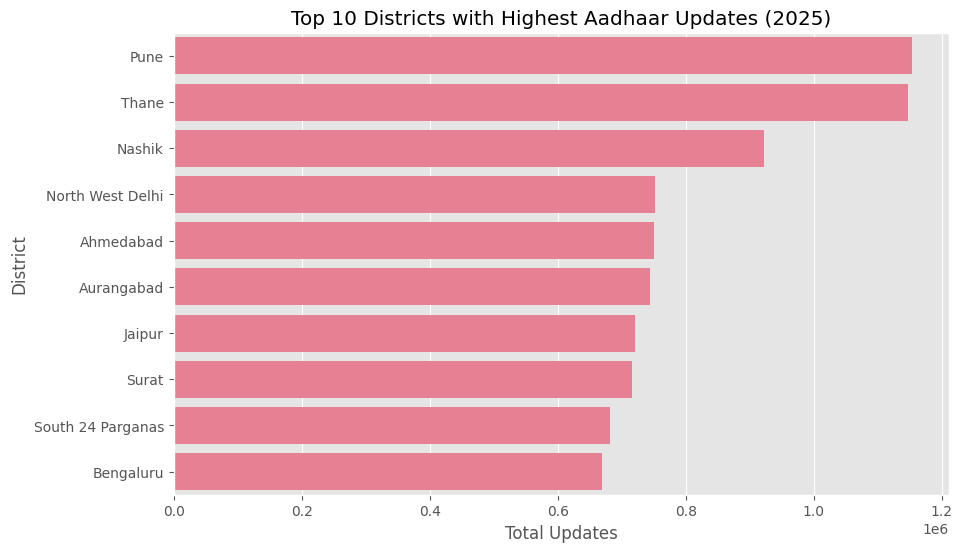

In [4]:
# 1. Mean Enrolment
mean_enrolment = df['Total_Enrolment'].mean()
print(f"Average Enrolment per entry: {mean_enrolment:.2f}")

# 2. Max Update Districts
# Group by district and sum the updates
district_updates = df.groupby('district')['Total_Updates'].sum().sort_values(ascending=False)
print("\nTop 5 Districts by Max Updates:")
print(district_updates.head(5))

# Visualize Top 10 Districts for Updates
plt.figure(figsize=(10, 6))
sns.barplot(x=district_updates.head(10).values, y=district_updates.head(10).index)
plt.title('Top 10 Districts with Highest Aadhaar Updates (2025)')
plt.xlabel('Total Updates')
plt.ylabel('District')
plt.show()

#### Enrolment Age Group Distribution (2025):


Age Group Distribution (Total Count):
age_0_5           4449121.0
age_5_17          2078129.0
age_18_greater     193474.0
dtype: float64


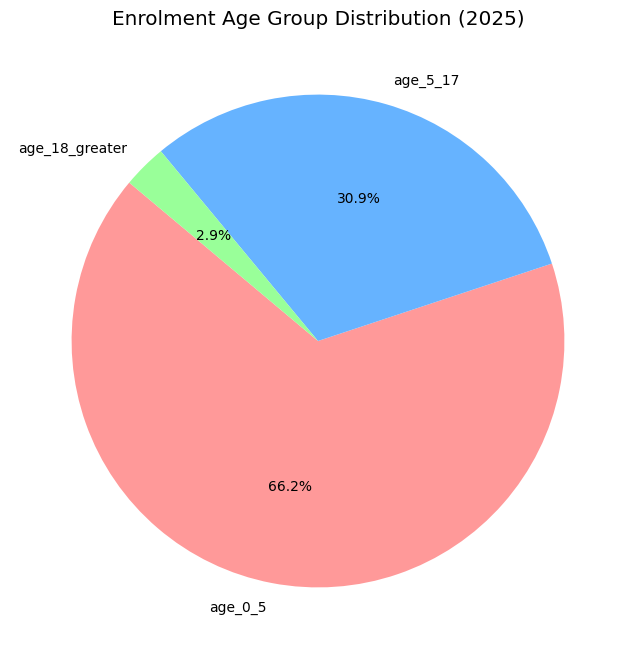

In [5]:
# 3. Age Group Distribution (Enrolment)
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
age_dist = df[age_cols].sum()

print("\nAge Group Distribution (Total Count):")
print(age_dist)

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Enrolment Age Group Distribution (2025)')
plt.show()

# Trends Analysis


Monthly Totals (2025):
           Total_Enrolment  Total_Updates
Month                                    
January                NaN            NaN
February               NaN            NaN
March              16582.0     21779665.0
April             289905.0     10799501.0
May               211566.0     10071518.0
June              234620.0     10166754.0
July              680163.0     12697673.0
August                 NaN            NaN
September        1757387.0     15495780.0
October          1091315.0     11454930.0
November         1477562.0     19374406.0
December          961624.0     21015056.0


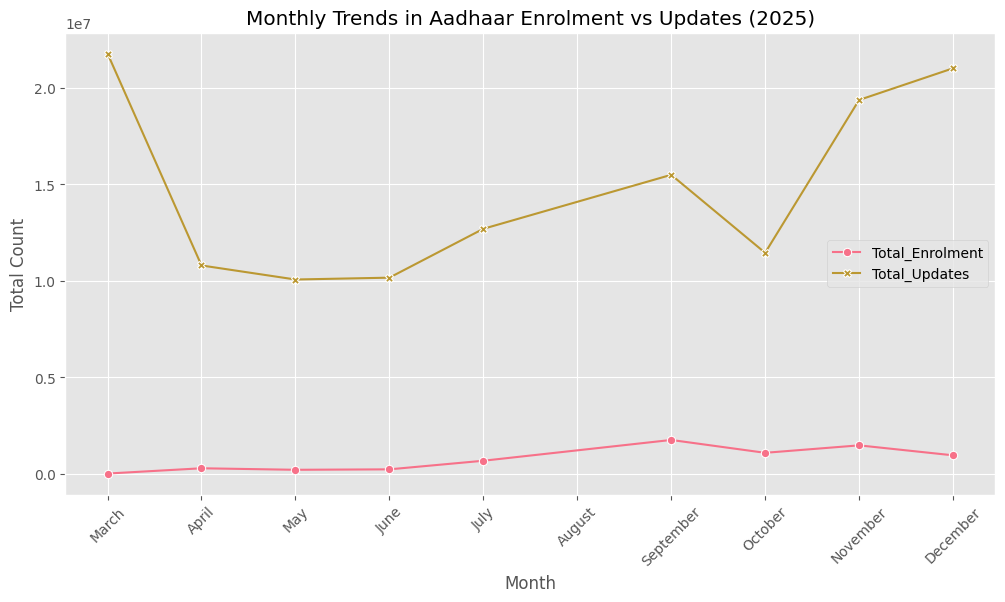

In [6]:
# 1. Monthly Trends in 2025
# Extract month name
df['Month'] = df['date'].dt.month_name()
# Ordered list of months for correct plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_trend = df.groupby('Month')[['Total_Enrolment', 'Total_Updates']].sum().reindex(months_order)

print("\nMonthly Totals (2025):")
print(monthly_trend)

# Plotting Monthly Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, sort=False, markers=True, dashes=False)
plt.title('Monthly Trends in Aadhaar Enrolment vs Updates (2025)')
plt.xticks(rotation=45)
plt.ylabel('Total Count')
plt.show()

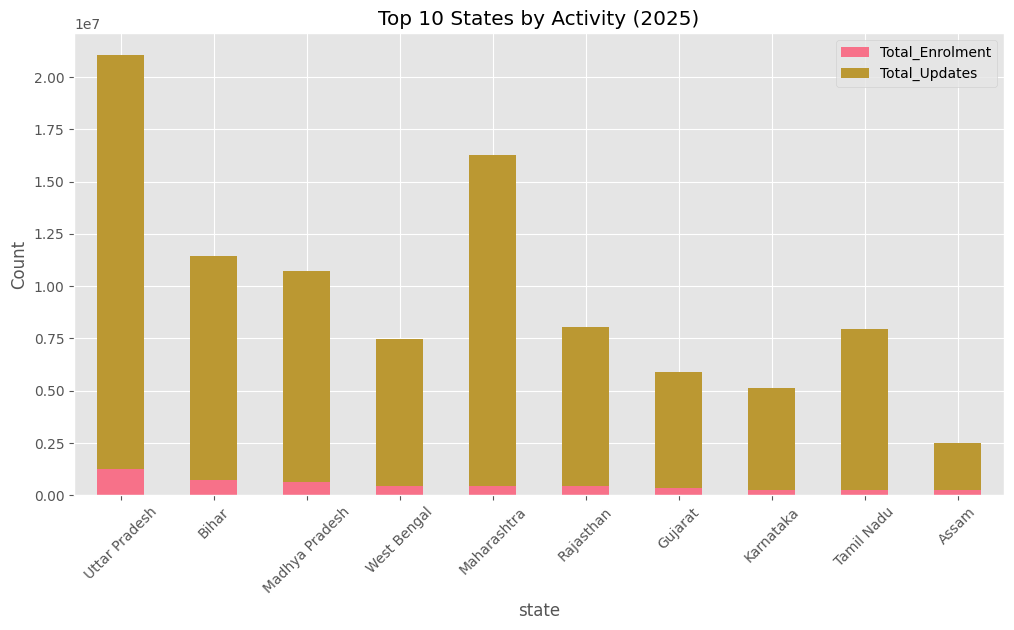

In [7]:
# 2. State-wise Distribution:
# Which states have the most activity in 2025?
state_activity = df.groupby('state')[['Total_Enrolment', 'Total_Updates']].sum().sort_values(by='Total_Enrolment', ascending=False).head(10)

# Plot
state_activity.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Top 10 States by Activity (2025)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Insights & Interpretation

## Executive Summary: "The March Phenomenon"
The most striking finding is the **massive spike in activity during March** (21.7 Million updates), likely driven by the **Financial Year End** (tax/banking deadlines).

## Key Patterns
1.  **Urban Magnet**: Pune, Thane, Delhi, and Ahmedabad dominate updates, reflecting **migration and employment compliance**.
2.  **Student Seasonality**: The 5-17 age group activity correlates with **academic calendars** (scholarships/admissions).

## Recommendations
*   **Dynamic Staffing**: Deploy surge staff in March/February.
*   **Targeted Camps**: Focus on schools in Jan-Feb and industrial zones in major cities.